# Load Libraries & Dataset
## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from statsmodels.tsa.stattools import adfuller, kpss, zivot_andrews

C:\Users\fahmi\AppData\Local\Temp\ipykernel_30092\2068835985.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Dataset

In [2]:
data = pd.read_csv("../dataset/SN_m_tot_V2.0_1749_2023.csv", names=["Year", "Month", "YearFrac", "MonthlyMeanSn", "MonthlyStDSn", "NObs", "DM"], 
                 delimiter=";")
data

,Year,Month,YearFrac,MonthlyMeanSn,MonthlyStDSn,NObs,DM
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
...,...,...,...,...,...,...,...
3289,2023,2,2023.122,110.9,20.7,891,0
3290,2023,3,2023.204,122.6,17.1,947,0
3291,2023,4,2023.286,96.4,17.1,1003,0
3292,2023,5,2023.371,137.9,19.3,1054,0


In [3]:
data['Date'] = pd.to_datetime(data.assign(day=1)[['Year', 'Month', 'day']]) + pd.offsets.MonthEnd(0)
data['Date'] = data['Date'].dt.date
data

,Year,Month,YearFrac,MonthlyMeanSn,MonthlyStDSn,NObs,DM,Date
0,1749,1,1749.042,96.7,-1.0,-1,1,1749-01-31
1,1749,2,1749.123,104.3,-1.0,-1,1,1749-02-28
2,1749,3,1749.204,116.7,-1.0,-1,1,1749-03-31
3,1749,4,1749.288,92.8,-1.0,-1,1,1749-04-30
4,1749,5,1749.371,141.7,-1.0,-1,1,1749-05-31
...,...,...,...,...,...,...,...,...
3289,2023,2,2023.122,110.9,20.7,891,0,2023-02-28
3290,2023,3,2023.204,122.6,17.1,947,0,2023-03-31
3291,2023,4,2023.286,96.4,17.1,1003,0,2023-04-30
3292,2023,5,2023.371,137.9,19.3,1054,0,2023-05-31


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           3294 non-null   int64  
 1   Month          3294 non-null   int64  
 2   YearFrac       3294 non-null   float64
 3   MonthlyMeanSn  3294 non-null   float64
 4   MonthlyStDSn   3294 non-null   float64
 5   NObs           3294 non-null   int64  
 6   DM             3294 non-null   int64  
 7   Date           3294 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 206.0+ KB


In [5]:
df = data[["Date", "MonthlyMeanSn"]].copy()
df

,Date,MonthlyMeanSn
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3289,2023-02-28,110.9
3290,2023-03-31,122.6
3291,2023-04-30,96.4
3292,2023-05-31,137.9


# Exploratory Data Analysis & Diagnosis
## Mean Monthly Sunspot Number

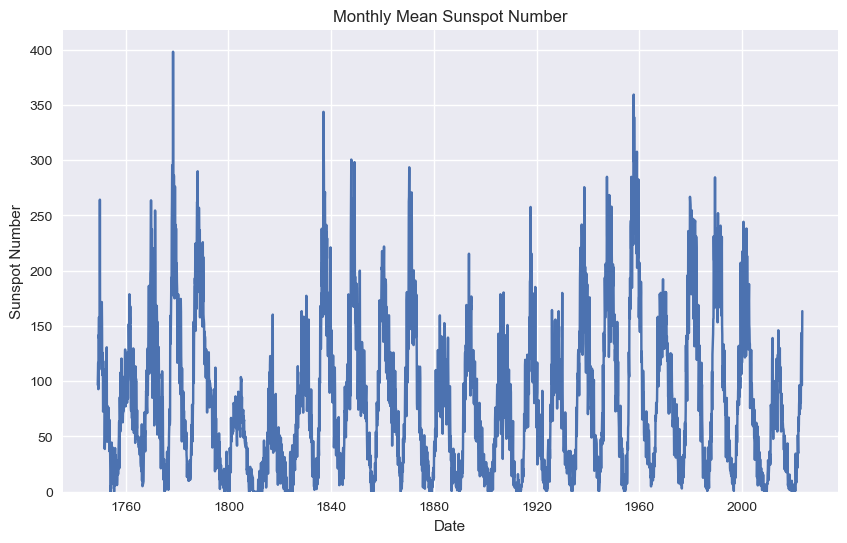

In [6]:
# Convert 'Date' to datetime objects (if not already done)
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(df, x="Date", y='MonthlyMeanSn')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.ylim(0)
plt.title('Monthly Mean Sunspot Number')
plt.show()

## Yearly Sunpsot Number

In [7]:
df_year = df.set_index("Date").resample("A").sum().reset_index()
df_year.columns = ["Year", "YearlySn"]
df_year

,Year,YearlySn
0,1749-12-31,1618.5
1,1750-12-31,1668.0
2,1751-12-31,953.3
3,1752-12-31,956.0
4,1753-12-31,613.5
...,...,...
270,2019-12-31,43.0
271,2020-12-31,105.5
272,2021-12-31,353.8
273,2022-12-31,996.4


## Decompose Time Series
### Monthly Sunspot: StatsModel

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

Figure(1000x800)


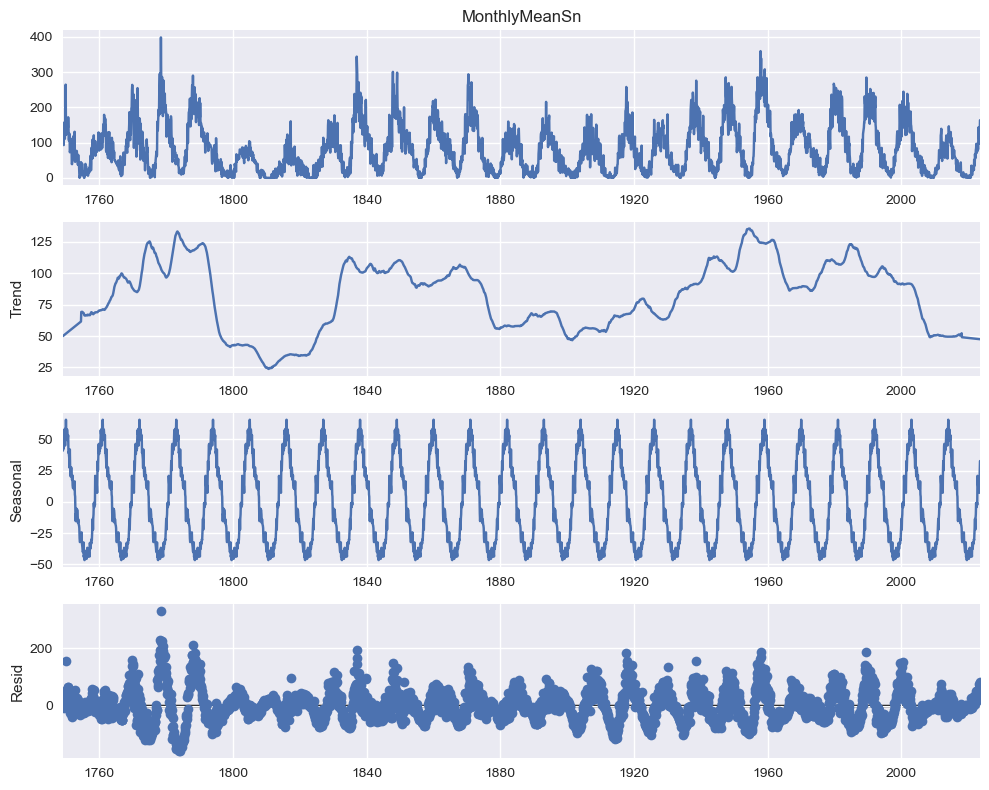

In [9]:
decomposition_result = seasonal_decompose(df.set_index("Date")["MonthlyMeanSn"], period=12*11, extrapolate_trend="freq")

plt.rcParams["figure.figsize"] = (10,8)
print(decomposition_result.plot())

Figure(1000x800)


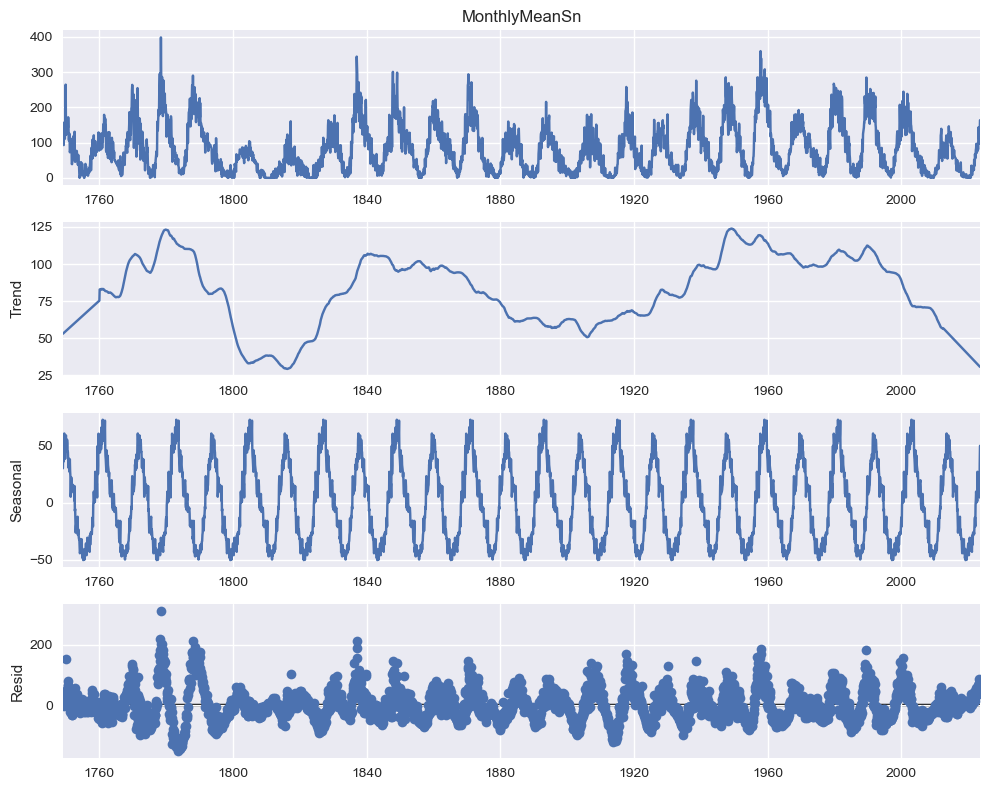

In [10]:
decomposition_result = seasonal_decompose(df.set_index("Date")["MonthlyMeanSn"], period=12*22, extrapolate_trend="freq")

plt.rcParams["figure.figsize"] = (10,8)
print(decomposition_result.plot())

### Monthly Sunspot: STL (LOESS)

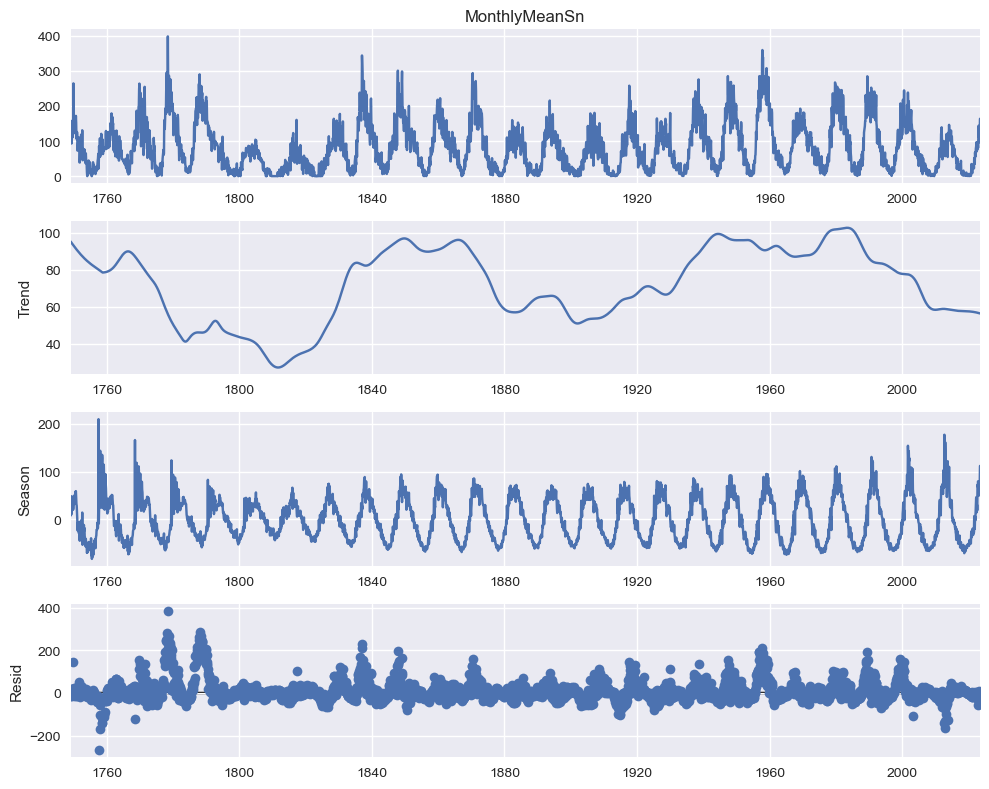

In [11]:
res = STL(df.set_index("Date")["MonthlyMeanSn"], seasonal=11, period=132, robust=True).fit()
res.plot()
plt.show()

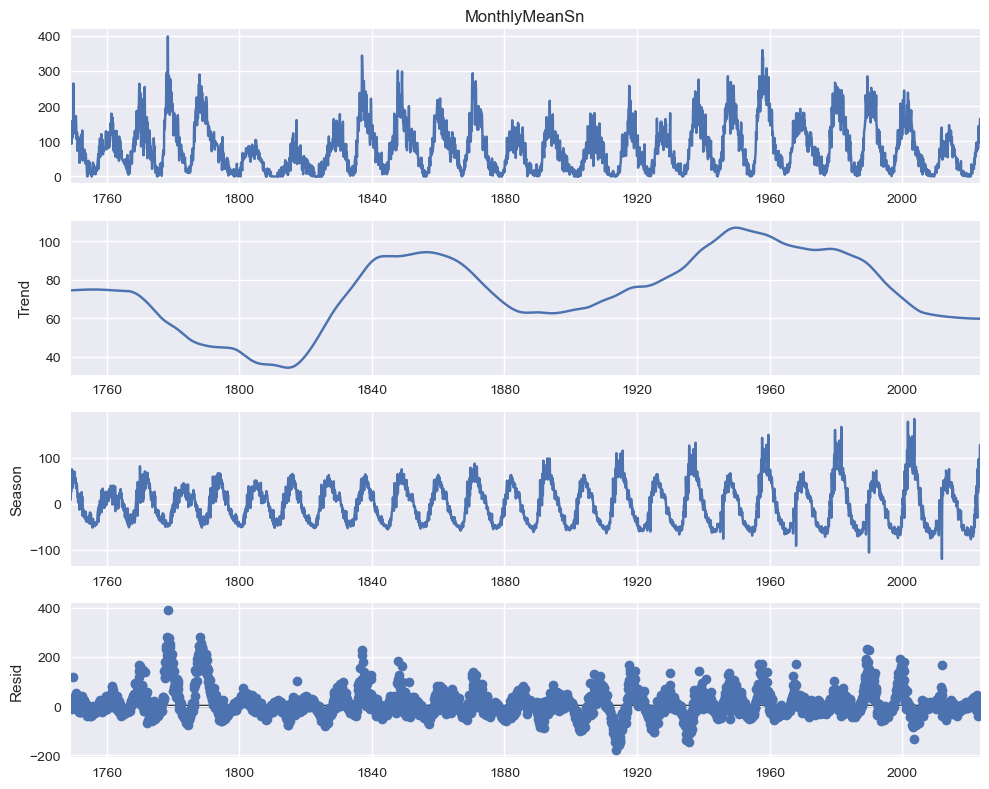

In [12]:
res = STL(df.set_index("Date")["MonthlyMeanSn"], seasonal=21, period=264, robust=True).fit()
res.plot()
plt.show()

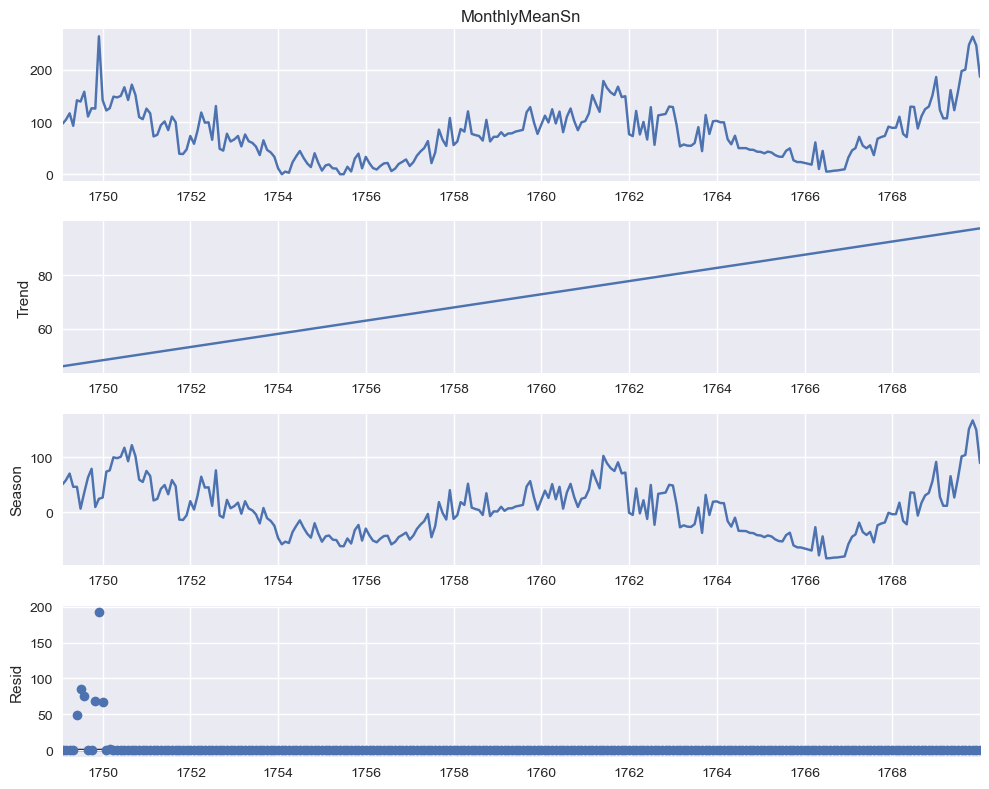

In [13]:
# Filter the data to include only the year 1749 until 1780

start_date = pd.to_datetime('1749-01-01')
end_date = pd.to_datetime('1769-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Perform the STL decomposition
res = STL(filtered_df.set_index("Date")["MonthlyMeanSn"], seasonal=11, period=132, 
          robust=True).fit()

# Plot the decomposition
res.plot()
plt.show()

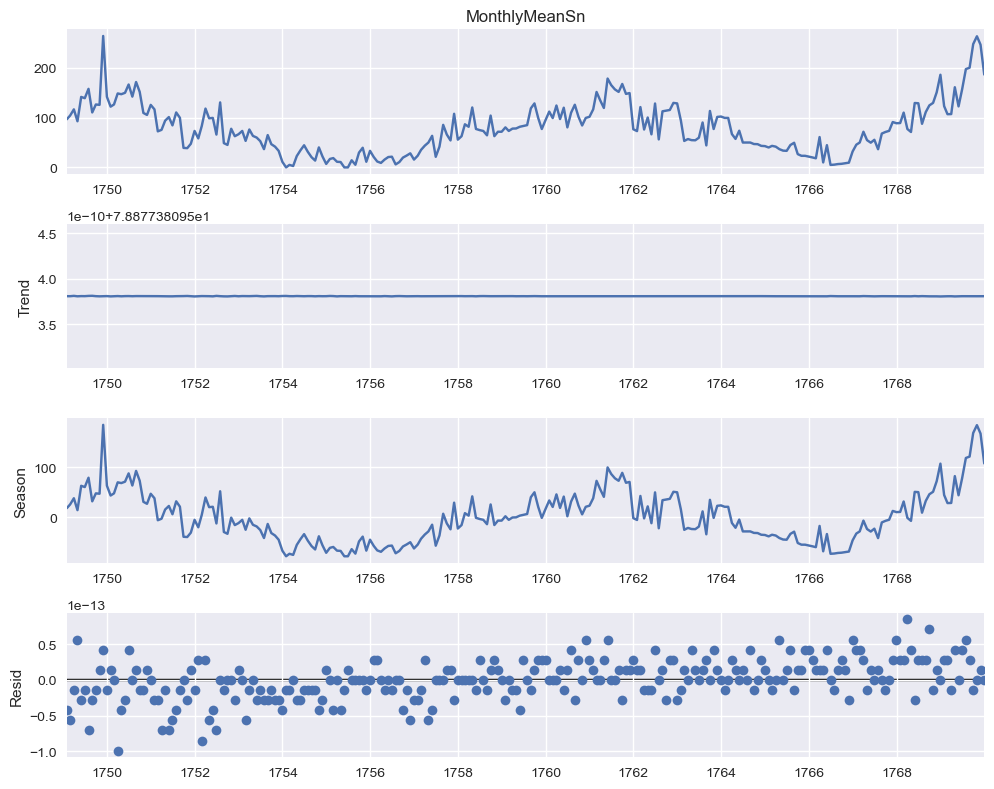

In [14]:
# Perform the STL decomposition
res = STL(filtered_df.set_index("Date")["MonthlyMeanSn"], seasonal=21, period=264, 
          robust=True).fit()

# Plot the decomposition
res.plot()
plt.show()

### Yearly Sunspot: StatsModel

Figure(1000x800)


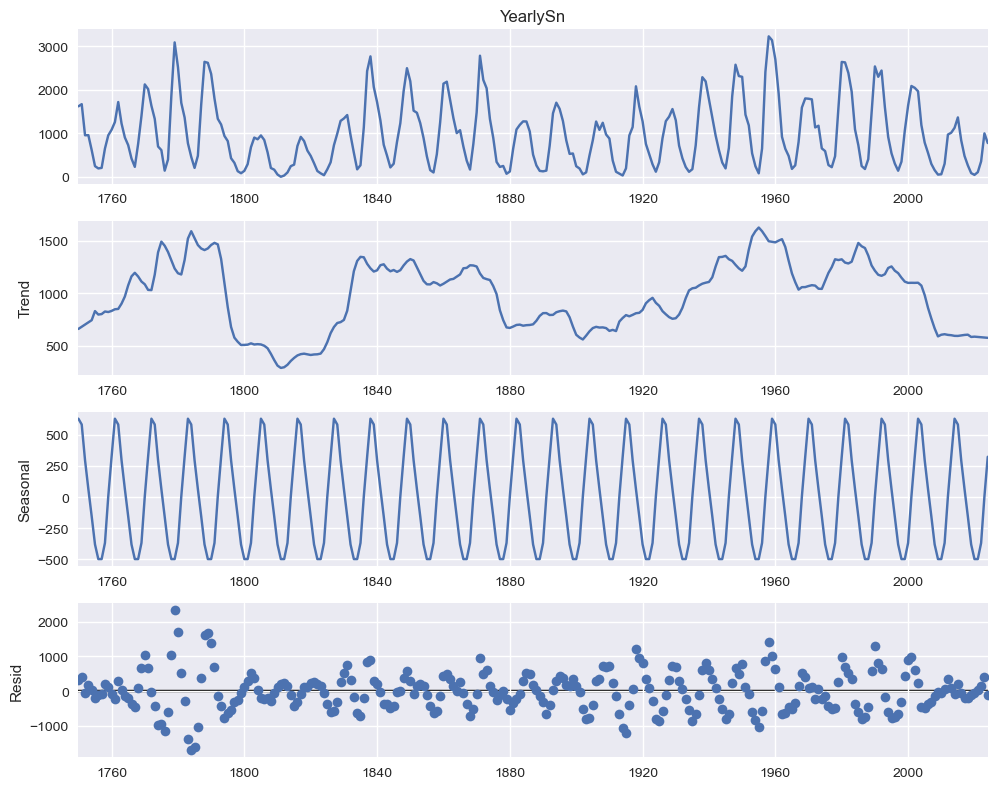

In [17]:
decomposition_result = seasonal_decompose(df_year.set_index("Year")["YearlySn"], period=11, extrapolate_trend="freq")

plt.rcParams["figure.figsize"] = (10,8)
print(decomposition_result.plot())

Figure(1000x800)


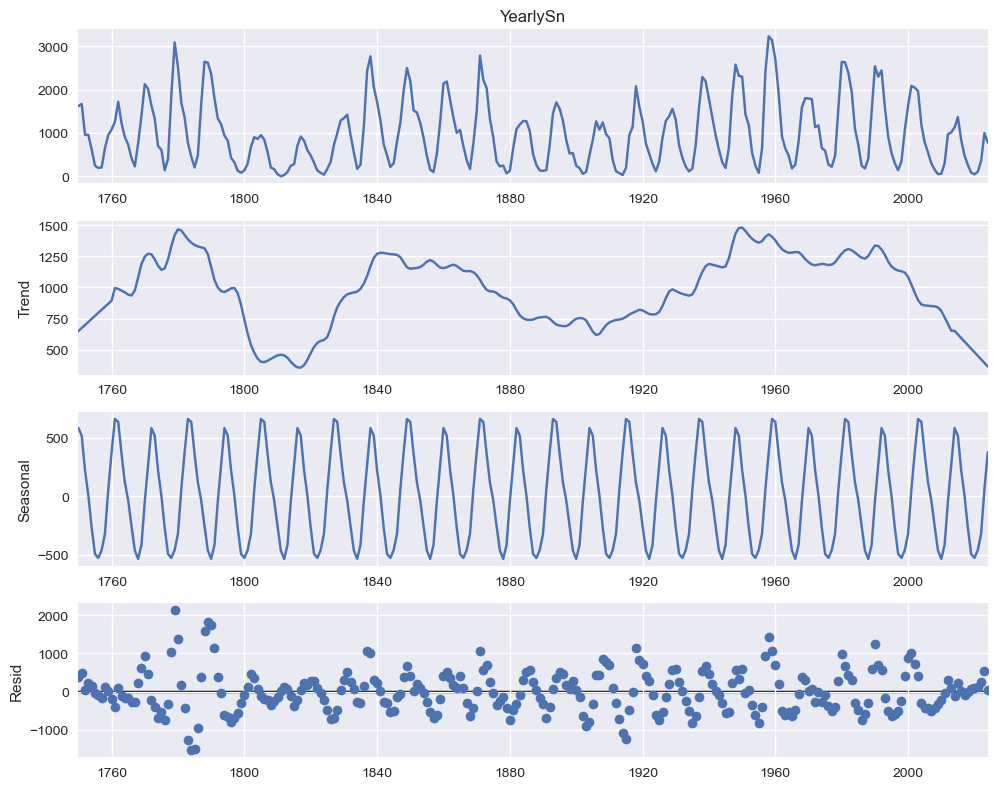

In [18]:
decomposition_result = seasonal_decompose(df_year.set_index("Year")["YearlySn"], period=22, extrapolate_trend="freq")

plt.rcParams["figure.figsize"] = (10,8)
print(decomposition_result.plot())

### Yearly Sunspot: STL (LOESS)

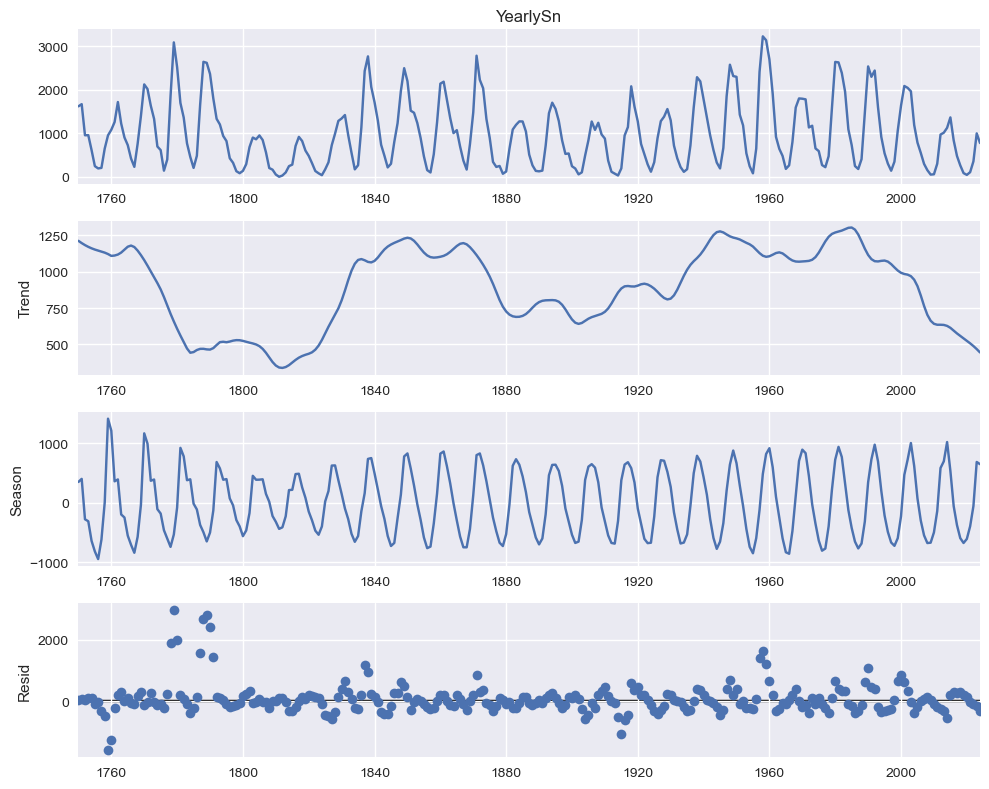

In [19]:
res = STL(df_year.set_index("Year")["YearlySn"], seasonal=11, period=11, robust=True).fit()
res.plot()
plt.show()

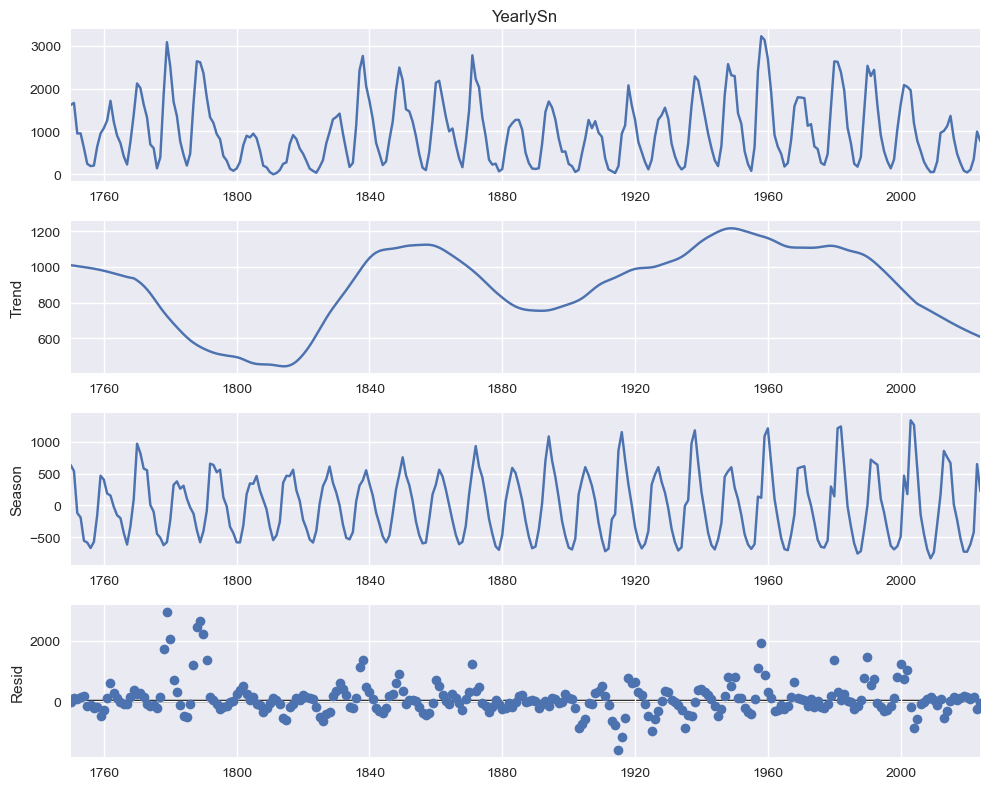

In [25]:
res = STL(df_year.set_index("Year")["YearlySn"], seasonal=11, period=22, robust=True, trend_deg=1, seasonal_deg=1, low_pass_deg=1).fit()
res.plot()
plt.show()

## Stationarity Test
### Helper Function

In [26]:
# unit root test

def unitroot_test_results(output, test='adf', confidence=0.05):    
    pval = output[1]
    test_score = output[0]
    lags = output[2]    
    decision = 'Non-Stationary'
    if test == 'adf':
        critical = output[4]
        if pval < confidence:
            decision = 'Stationary'
    elif test=='kpss':
        critical = output[3]
        if pval >= confidence:
            decision = 'Stationary'            
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Numbers of lags': lags,
    'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value
       
    return pd.Series(output_dict, name=test) 

In [27]:
def za_test_results(output, test='za', confidence=0.05):
    pval = output[1]
    test_score = output[0]
    lags = output[3]
    decision = 'Non-Stationary'
    if test == 'za':
        critical = output[2]
        if pval < confidence:
            decision = 'Stationary'
    output_dict = {
        'Test Statistic': test_score,
        'p-value': pval,
        'Numbers of lags': lags,
        'decision': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [28]:
import warnings
import math
try:
    import pymannkendall as mk
    MANN_KENDALL_INSTALLED = True
except ImportError:
    MANN_KENDALL_INSTALLED = False
from collections import namedtuple
from scipy.signal import argrelmax
from scipy.stats import norm
import scipy.stats as stats
# from src.transforms.target_transformations import AdditiveDifferencingTransformer, MultiplicativeDifferencingTransformer, LogTransformer, BoxCoxTransformer, YeoJohnsonTransformer, DetrendingTransformer
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
from statsmodels.tsa.stattools import acf

def _check_convert_y(y):
    assert not np.any(np.isnan(y)), "`y` should not have any nan values"
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y = y.values.squeeze()
    assert y.ndim==1
    return y

def _check_stationary_adfuller(y, confidence, **kwargs):
    y = _check_convert_y(y)
    res = namedtuple("ADF_Test", ["stationary", "results"])
    result = adfuller(y, **kwargs)
    if result[1]>confidence:
        return res(False, result)
    else:
        return res(True, result)
    
def _check_stationary_kpss(y, confidence, **kwargs):
    y = _check_convert_y(y)
    res = namedtuple("KPSS_Test", ["stationary", "results"])
    result = kpss(y, **kwargs)
    if result[1]<confidence:
        return res(False, result)
    else:
        return res(True, result)

def check_unit_root(y, confidence=0.05, adf_params={}):
    adf_params['regression'] = "c"
    return _check_stationary_adfuller(y, confidence, **adf_params)

def _check_kendall_tau(y, confidence=0.05):
    y = _check_convert_y(y)
    
    tau, p_value = stats.kendalltau(y, np.arange(len(y)))
    trend=True if p_value<confidence else False
    if tau>0:
        direction="increasing"
    else:
        direction="decreasing"
    return "Kendall_Tau_Test",tau, p_value, trend, direction

#https://abhinaya-sridhar-rajaram.medium.com/mann-kendall-test-in-python-for-trend-detection-in-time-series-bfca5b55b
def _check_mann_kendall(y, confidence=0.05, seasonal_period=None, prewhiten=None):
    if not MANN_KENDALL_INSTALLED:
        raise ValueError("`pymannkendall` needs to be installed for the mann_kendal test. `pip install pymannkendall` to install")
    #https://www.tandfonline.com/doi/pdf/10.1623/hysj.52.4.611
    if prewhiten is None:
        if len(y)<50:
            prewhiten = True
        else:
            prewhiten = False
    else:
        if not prewhiten and len(y)<50:
            warnings.warn("For timeseries with < 50 samples, it is recommended to prewhiten the timeseries. Consider passing `prewhiten=True`")
        if prewhiten and len(y)>50:
            warnings.warn("For timeseries with > 50 samples, it is not recommended to prewhiten the timeseries. Consider passing `prewhiten=False`")
    y = _check_convert_y(y)
    if seasonal_period is None:
        if prewhiten:
            _res = mk.pre_whitening_modification_test(y, alpha=confidence)
        else:
            _res = mk.original_test(y, alpha=confidence)
    else:
        _res = mk.seasonal_test(y, alpha=confidence, period=seasonal_period)
    trend=True if _res.p<confidence else False
    if _res.slope>0:
        direction="increasing"
    else:
        direction="decreasing"
    return type(_res).__name__,_res.slope, _res.p, trend, direction

def check_trend(y, confidence=0.05, seasonal_period=None, mann_kendall=False, prewhiten=None):
    if mann_kendall:
        name, slope, p, trend, direction = _check_mann_kendall(y, confidence, seasonal_period, prewhiten)
    else:
        name, slope, p, trend, direction = _check_kendall_tau(y, confidence)
    det_trend_res = check_deterministic_trend(y, confidence)
    res = namedtuple(name, ["trend", "direction", "slope", "p_value", "deterministic", "deterministic_trend_results"])
    return res(trend, direction, slope, p, det_trend_res.deterministic_trend, det_trend_res)

def check_deterministic_trend(y, confidence=0.05):
    res = namedtuple("ADF_deterministic_Trend_Test", ["deterministic_trend", "adf_res", "adf_ct_res"])
    adf_res = _check_stationary_adfuller(y, confidence)
    adf_ct_res = _check_stationary_adfuller(y, confidence, regression="ct")
    if (not adf_res.stationary) and (adf_ct_res.stationary):
        deterministic_trend = True
    else:
        deterministic_trend = False
    return res(deterministic_trend, adf_res, adf_ct_res)


#https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f
def check_heteroscedastisticity(y, confidence=0.05):
    y = _check_convert_y(y)
    res = namedtuple("White_Test", ["heteroscedastic", "lm_statistic", "lm_p_value"])
    #Fitting a linear trend regression
    x = np.arange(len(y))
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()
    lm_stat, lm_p_value, f_stat, f_p_value = het_white(results.resid, x)
    if lm_p_value<confidence and f_p_value < confidence:
        hetero = True
    else:
        hetero = False
    return res(hetero, lm_stat, lm_p_value)


def _bartlett_formula(r: np.ndarray,
                      m: int,
                      length: int) -> float:
    """
    Computes the standard error of `r` at order `m` with respect to `length` according to Bartlett's formula.
    Parameters
    ----------
    r
        The array whose standard error is to be computed.
    m
        The order of the standard error.
    length
        The size of the underlying sample to be used.
    Returns
    -------
    float
        The standard error of `r` with order `m`.
    """

    if m == 1:
        return math.sqrt(1 / length)
    else:
        return math.sqrt((1 + 2 * sum(map(lambda x: x ** 2, r[:m - 1]))) / length)

# Adapted and generalised fomr https://github.com/unit8co/darts/blob/f0bb54ba26ffea66e199331a1e64b2bf1f92a28b/darts/utils/statistics.py#L25
def check_seasonality(y, max_lag=24, seasonal_period=None, confidence=0.05, verbose=True):
    res = namedtuple("Seasonality_Test", ["seasonal", "seasonal_periods"])
    y = _check_convert_y(y)
    if seasonal_period is not None and (seasonal_period < 2 or not isinstance(seasonal_period, int)):
        raise ValueError('seasonal_period must be an integer greater than 1.')

    if seasonal_period is not None and seasonal_period >= max_lag:
        raise ValueError('max_lag must be greater than seasonal_period.')

    n_unique = np.unique(y).shape[0]

    if n_unique == 1:  # Check for non-constant TimeSeries
        return res(False, 0)
    r = acf(y, nlags=max_lag, fft=False)  # In case user wants to check for seasonality higher than 24 steps.

    # Finds local maxima of Auto-Correlation Function
    candidates = argrelmax(r)[0]

    if len(candidates) == 0:
        if verbose:
            print('The ACF has no local maximum for m < max_lag = {}. Try larger max_lag'.format(max_lag))
        return res(False, 0)

    if seasonal_period is not None:
        # Check for local maximum when m is user defined.
        test = seasonal_period not in candidates

        if test:
            return res(False, seasonal_period)

        candidates = [seasonal_period]

    # Remove r[0], the auto-correlation at lag order 0, that introduces bias.
    r = r[1:]

    # The non-adjusted upper limit of the significance interval.
    band_upper = r.mean() + norm.ppf(1 - confidence / 2) * r.var()

    # Significance test, stops at first admissible value. The two '-1' below
    # compensate for the index change due to the restriction of the original r to r[1:].
    for candidate in candidates:
        stat = _bartlett_formula(r, candidate - 1, len(y))
        if r[candidate - 1] > stat * band_upper:
            return res(True, candidate)
    return res(False, 0)


# def check_stationarity(x, confidence=0.05, adf_params={}, kpss_params={}):
#     if "nlags" not in kpss_params:
#         kpss_params['nlags'] = "auto"
#     adf_params['regression'] = "c"
#     adf_stationary, adf_results = _check_stationary_adfuller(x, confidence, **adf_params)
#     adf_params['regression'] = "ct"
#     adf_ct_stationary, adf_ct_results = _check_stationary_adfuller(x, confidence, **adf_params)
#     kpss_params['regression'] = "c"
#     kpss_stationary, kpss_results = _check_stationary_kpss(x, confidence, **kpss_params)
#     kpss_params['regression'] = "ct"
#     kpss_ct_stationary, kpss_ct_results = _check_stationary_kpss(x, confidence, **kpss_params)
#     ret_dict ={
#         "adf": adf_stationary,
#         "adf_ct": adf_ct_stationary,
#         "kpss": kpss_stationary,
#         "kpss_ct": kpss_ct_stationary,
#         "adf_results": adf_results,
#         "kpss_results": kpss_results,
#         "adf_ct_results": adf_ct_results,
#         "kpss_ct_results": kpss_ct_results
#     }
#     if adf_stationary and kpss_stationary:
#         ret_dict['type'] = "stationary"
#     elif (not adf_stationary and adf_ct_stationary) and (not kpss_stationary and kpss_ct_stationary):
#         ret_dict['type'] = "trend-stationary"
#     else:
#         ret_dict['type'] = "non-stationary"
#     return ret_dict


# TRANSFORM_CLASSES = [LogTransformer, YeoJohnsonTransformer, BoxCoxTransformer]
# DIFFERENCING_CLASSES = [MultiplicativeDifferencingTransformer, LogDifferencingTransformer]
# def make_stationary(y, diff_gap=1, freq=None, confidence=0.05, verbose=False):
#     transforms = []
#     res = check_stationarity(y, confidence)
#     if res['type'] == "stationary":
#         if verbose:
#             print("Series already stationary")
#         return y, transforms
#     else:
#         if verbose:
#             print("Applying Differencing")
#         diff = AdditiveDifferencingTransformer(diff_gap=diff_gap)
#         diff.fit(y, freq=freq)
#         y_diff = diff.transform(y)
#         transforms.append(diff)
#         res = check_stationarity(y_diff.dropna(), confidence)
#         if res['type'] == "stationary":
#             if verbose:
#                 print("Series stationary")
#             return y_diff, transforms
#         elif res['type'] == "trend-stationary":
#             #Detrend
#             if verbose:
#                 print("Detrending")
#             detrender = DetrendingTransformer(degree=1)
#             detrender.fit(y_diff, freq=freq)
#             y_detrend = detrender.transform(y_diff)
#             res = check_stationarity(y_detrend.dropna(), confidence)
#             if res['type'] == "stationary":
#                 #append transform to list
#                 if verbose:
#                     print("Series stationary")
#                 transforms.append(detrender)
#                 return y_detrend, transforms
#         for tr in DIFFERENCING_CLASSES:
#             if verbose:
#                 print(f"Applying {tr.__name__}")
#             transform = tr(diff_gap=diff_gap)
#             transform.fit(y, freq=freq)
#             y_tr = transform.transform(y)
#             res = check_stationarity(y_tr.dropna(), confidence)
#             if res['type'] == "stationary":
#                 if verbose:
#                     print("Series stationary")
#                 transforms.append(transform)
#                 return y_tr, transforms
        
#         for tr in TRANSFORM_CLASSES:
#             if verbose:
#                 print(f"Applying {tr.__name__}")
#             transform = tr()
#             y_tr = transform.fit_transform(y)
#             res = check_stationarity(y_tr.dropna(), confidence)
#             if res['type'] == "stationary":
#                 if verbose:
#                     print("Series stationary")
#                 transforms.append(transform)
#                 return y_tr, transforms
#         # Returning default case of a BoxCoxTransformer
#         transforms.append(transform)
#         return y_tr, transforms

### Unit Root Test: Monthly

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- Case 1: Both tests conclude that the series is not stationary - The series is not stationary
- Case 2: Both tests conclude that the series is stationary - The series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.
Here, due to the difference in the results from ADF test and KPSS test, it can be inferred that the series is trend stationary and not strict stationary. The series can be detrended by differencing or by model fitting.

Here's a summary of the regression parameter options:

- c: This includes a constant intercept in the AR(p) model. It means that the ADF test is performed assuming that the time series has a constant mean (a non-zero intercept). If the time series has a deterministic trend, the ADF test might not be able to detect it as it allows for a non-zero mean.

- n: This means no constant intercept is included in the AR(p) model. It assumes that the time series has a zero mean, and any trend is entirely deterministic. The ADF test with this option will check for a unit root without considering any deterministic trend.

- ct: This includes both a constant intercept and a linear, deterministic trend in the AR(p) model. If the time series has a deterministic linear trend, the ADF test will remove it, and the test will check for stationarity after detrending the series.

- ctt: This includes a constant intercept, linear trend, and quadratic trend in the AR(p) model. It allows for both linear and quadratic deterministic trends to be removed from the time series before conducting the stationarity test.

By using different regression parameter settings, you can check whether the observed trend in the time series is deterministic (detected as non-stationary) or stochastic (detected as stationary). This can help distinguish between time series with trends that result from deterministic factors (e.g., linear or quadratic trends) from those with trends driven by stochastic processes.

In [29]:
pd.options.display.float_format = "{:.6f}".format

adf_output = adfuller(df.set_index("Date")["MonthlyMeanSn"], regression='ct')
za_output = zivot_andrews(df.set_index("Date")["MonthlyMeanSn"], regression='ct')
kpss_output = kpss(df.set_index("Date")["MonthlyMeanSn"], regression='ct')

pd.concat([
    unitroot_test_results(adf_output, 'adf'),
    unitroot_test_results(kpss_output, 'kpss'),
    za_test_results(za_output, 'za')
], axis=1)

C:\Users\fahmi\anaconda3\envs\ts_model\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,adf,kpss,za
Test Statistic,-10.633498,0.073052,-11.113288
p-value,0.000000,0.100000,0.000854
Numbers of lags,28,36,28
decision,Stationary,Stationary,Stationary
Critical Value (1%),-3.961545,0.216000,-5.575560
Critical Value (5%),-3.411836,0.146000,-5.073320
Critical Value (10%),-3.127842,0.119000,-4.826680
Critical Value (2.5%),NaN,0.176000,NaN


### Unit Root Test: Yearly

In [30]:
pd.options.display.float_format = "{:.6f}".format

adf_output = adfuller(df_year.set_index("Year")["YearlySn"], regression='ct')
za_output = zivot_andrews(df_year.set_index("Year")["YearlySn"], regression='ct')
kpss_output = kpss(df_year.set_index("Year")["YearlySn"], regression='ct')

pd.concat([
    unitroot_test_results(adf_output, 'adf'),
    unitroot_test_results(kpss_output, 'kpss'),
    za_test_results(za_output, 'za')
], axis=1)

C:\Users\fahmi\anaconda3\envs\ts_model\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,adf,kpss,za
Test Statistic,-2.641958,0.084621,-3.488723
p-value,0.260963,0.100000,0.816695
Numbers of lags,8,7,8
decision,Non-Stationary,Stationary,Non-Stationary
Critical Value (1%),-3.993213,0.216000,-5.575560
Critical Value (5%),-3.427125,0.146000,-5.073320
Critical Value (10%),-3.136827,0.119000,-4.826680
Critical Value (2.5%),NaN,0.176000,NaN


### Check Trend: Monthly

In [31]:
kendall_tau_res = check_trend(y_seasonal, confidence=0.05)
mann_kendall_res = check_trend(y_seasonal, confidence=0.05, mann_kendall=True)
mann_kendall_seas_res = check_trend(y_seasonal, confidence=0.05, mann_kendall=True, seasonal_period=11*22)
print(f"Kendalls Tau: Trend: {kendall_tau_res.trend} | Direction: {kendall_tau_res.direction} | Deterministic: {kendall_tau_res.deterministic}")
print(f"Mann-Kendalls: Trend: {mann_kendall_res.trend} | Direction: {mann_kendall_res.direction} | Deterministic: {mann_kendall_res.deterministic}")
print(f"Mann-Kendalls Seasonal: Trend: {mann_kendall_seas_res.trend} | Direction: {mann_kendall_seas_res.direction} | Deterministic: {mann_kendall_seas_res.deterministic}")

Kendalls Tau: Trend: False | Direction: increasing | Deterministic: False
Mann-Kendalls: Trend: False | Direction: increasing | Deterministic: False
Mann-Kendalls Seasonal: Trend: True | Direction: increasing | Deterministic: False


### Check Trend: Yearly

In [32]:
kendall_tau_res = check_trend(df_year.set_index("Year")["YearlySn"], confidence=0.05)
mann_kendall_res = check_trend(df_year.set_index("Year")["YearlySn"], confidence=0.05, mann_kendall=True)
mann_kendall_seas_res = check_trend(df_year.set_index("Year")["YearlySn"], confidence=0.05, mann_kendall=True, seasonal_period=11)
print(f"Kendalls Tau: Trend: {kendall_tau_res.trend} | Direction: {kendall_tau_res.direction} | Deterministic: {kendall_tau_res.deterministic}")
print(f"Mann-Kendalls: Trend: {mann_kendall_res.trend} | Direction: {mann_kendall_res.direction} | Deterministic: {mann_kendall_res.deterministic}")
print(f"Mann-Kendalls Seasonal: Trend: {mann_kendall_seas_res.trend} | Direction: {mann_kendall_seas_res.direction} | Deterministic: {mann_kendall_seas_res.deterministic}")

Kendalls Tau: Trend: False | Direction: increasing | Deterministic: False
Mann-Kendalls: Trend: False | Direction: increasing | Deterministic: False
Mann-Kendalls Seasonal: Trend: False | Direction: increasing | Deterministic: False


### Check Seasonality: Monthly

In [37]:
seasonality_res = check_seasonality(df.set_index("Date")["MonthlyMeanSn"], max_lag=600, seasonal_period=132, confidence=0.05)
print(f"Seasonality Test for 132th lag: {seasonality_res.seasonal}")
# seasonality_id_res = check_seasonality(df.set_index("Date")["MonthlyMeanSn"], max_lag=300, confidence=0.05)
# print(f"Seasonality identified for: {seasonality_res.seasonal_periods}")

Seasonality Test for 132th lag: False


### Check Seasonality: Yearly

In [35]:
seasonality_res = check_seasonality(df_year.set_index("Year")["YearlySn"], max_lag=40, seasonal_period=11, confidence=0.05)
print(f"Seasonality Test for 11th lag: {seasonality_res.seasonal}")

Seasonality Test for 11th lag: True


## Autocorrelation Test: 
### Monthly

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Figure(2500x1200)


C:\Users\fahmi\anaconda3\envs\ts_model\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Figure(2500x1200)
Figure(2500x1200)


C:\Users\fahmi\anaconda3\envs\ts_model\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Figure(2500x1200)
Figure(2500x1200)


C:\Users\fahmi\anaconda3\envs\ts_model\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Figure(2500x1200)


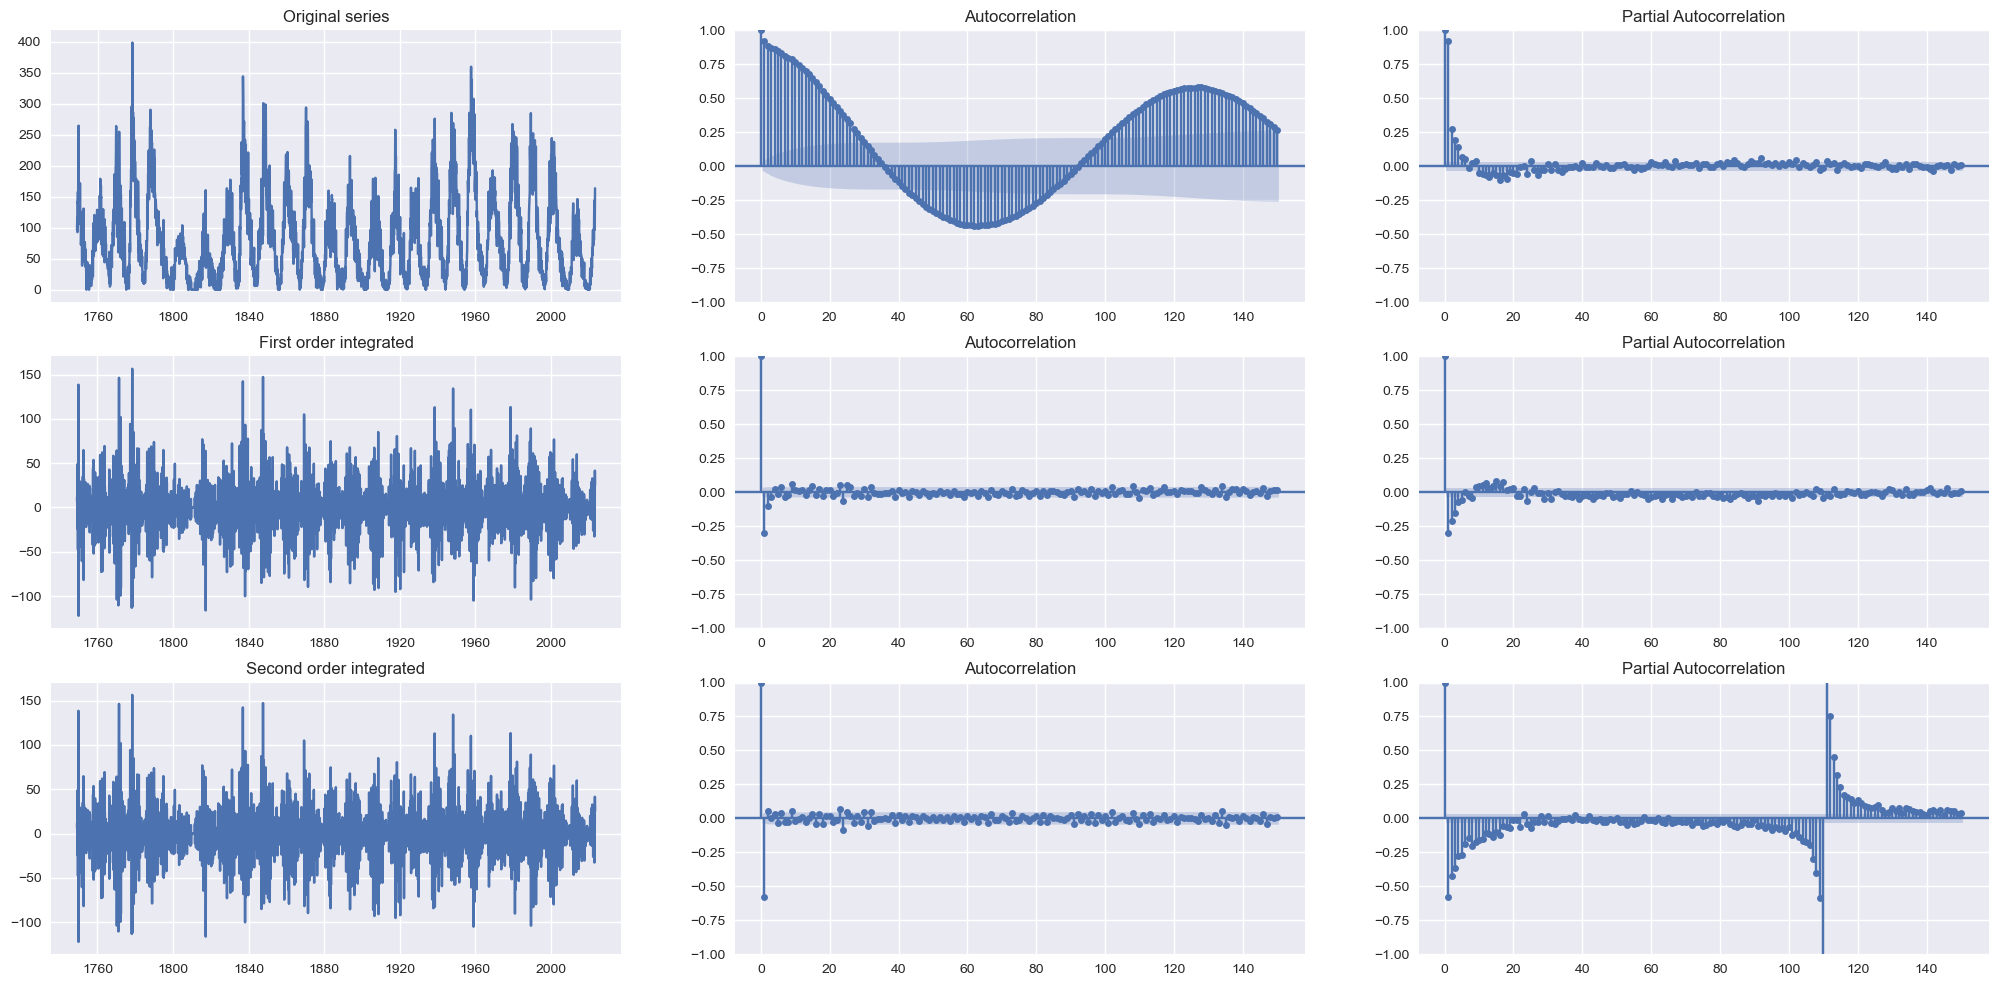

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(25, 12))
# plot original series
original = df.set_index("Date")["MonthlyMeanSn"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series")
print(plot_acf(original, ax=axes[0,1], lags=150))
print(plot_pacf(original, ax=axes[0,2], lags=150))

# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
print(plot_acf(first_order_int, ax=axes[1,1], lags=150))
print(plot_pacf(first_order_int, ax=axes[1,2], lags=150))

# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated")
print(plot_acf(second_order_int, ax=axes[2,1], lags=150))
print(plot_pacf(second_order_int, ax=axes[2,2], lags=150))

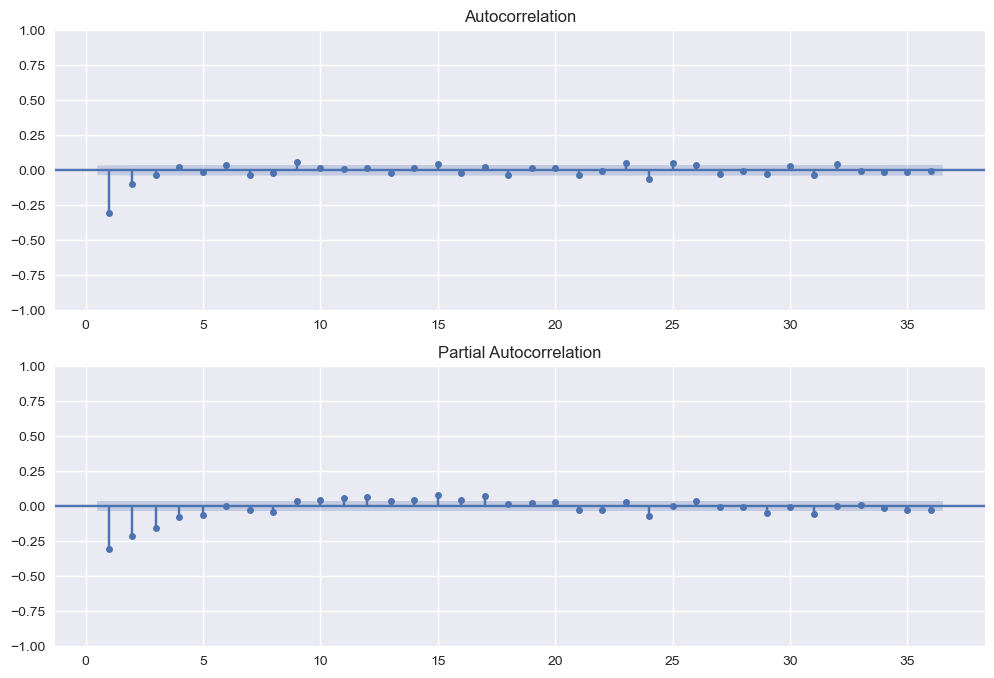

In [40]:
original_diff = original.diff().dropna()
fig, ax = plt.subplots(2,1, figsize=(12,8))
plot_acf(original_diff, zero=False, ax=ax[0])
plot_pacf(original_diff, zero=False, ax=ax[1])
plt.show()

### Yearly

Figure(2500x1200)
Figure(2500x1200)
Figure(2500x1200)


C:\Users\fahmi\anaconda3\envs\ts_model\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ts_model\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Figure(2500x1200)
Figure(2500x1200)


C:\Users\fahmi\anaconda3\envs\ts_model\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Figure(2500x1200)


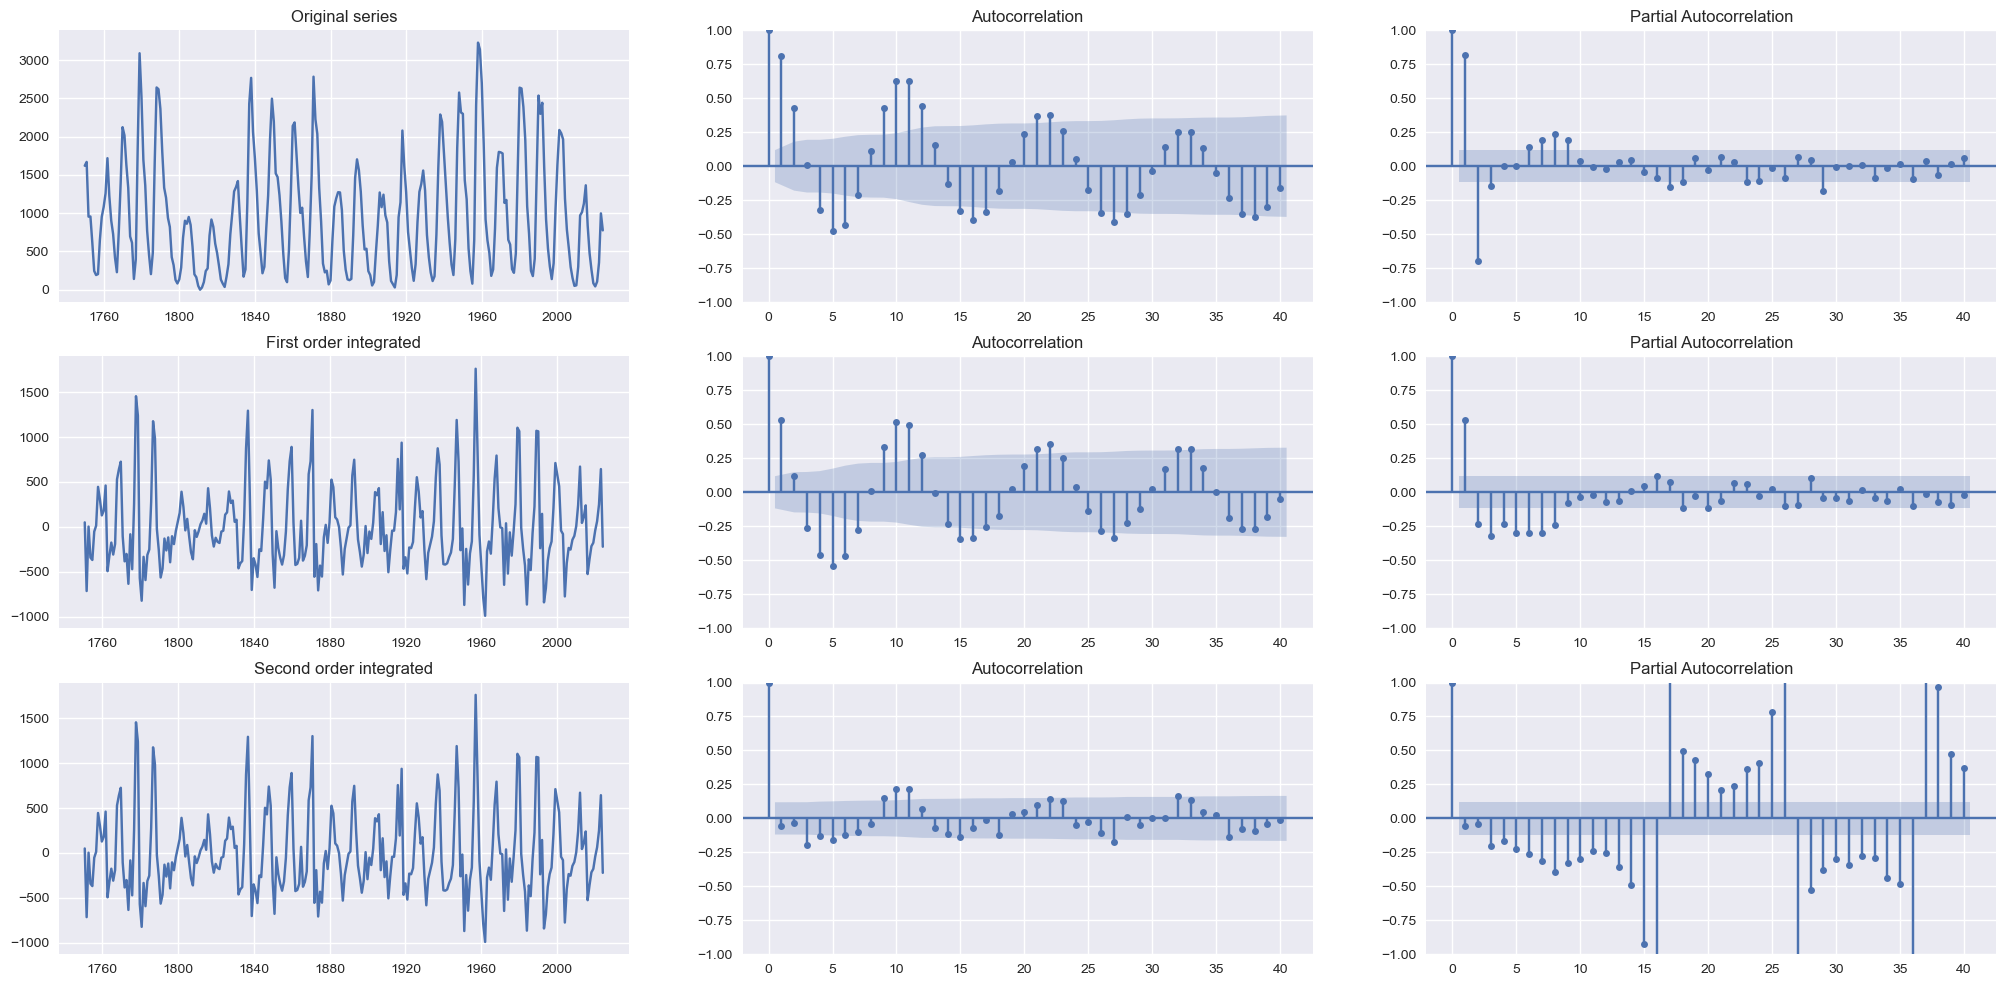

In [41]:
fig, axes = plt.subplots(3, 3, figsize=(25, 12))
# plot original series
original = df_year.set_index("Year")["YearlySn"]
axes[0,0].plot(original)
axes[0,0].set_title("Original series")
print(plot_acf(original, ax=axes[0,1], lags=40))
print(plot_pacf(original, ax=axes[0,2], lags=40))

# plot first order integrated series
first_order_int = original.diff().dropna()
axes[1,0].plot(first_order_int)
axes[1,0].set_title("First order integrated")
print(plot_acf(first_order_int, ax=axes[1,1], lags=40))
print(plot_pacf(first_order_int, ax=axes[1,2], lags=40))

# plot first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2,0].plot(first_order_int)
axes[2,0].set_title("Second order integrated")
print(plot_acf(second_order_int, ax=axes[2,1], lags=40))
print(plot_pacf(second_order_int, ax=axes[2,2], lags=40))